In [112]:
import pygame, argparse, csv, time
import argparse
import numpy as np
from time import sleep
from numpy.random import randint
from queue import PriorityQueue
from itertools import count
import matplotlib.pyplot as plt
import copy

In [113]:
def is_in_grid(pos, grid_dim):
    (max_x, max_y) = grid_dim # unroll the dimensions
    (x, y) = pos # unroll the position coordinates
    return bool((x < max_x) and (x >= 0) and (y < max_y) and (y >= 0)) # only true if both true

In [114]:
def get_next_cells(pos, grid_dim):
    x, y = pos # unroll the position coordinates
    possible_moves = []
    movements_1 = [(0, 1), (0, -1),(1, 0), (-1, 0)] # possible moves from current cell
    movements_2 = [(0, 2), (0, -2), (2, 0), (-2, 0)] # possible moves from the next cell
    for i in range(len(movements_1)):
        move_1 = movements_1[i]
        move_2 = movements_2[i]
        if is_in_grid((x + move_1[0], y + move_1[1]), grid_dim) and is_in_grid((x + move_2[0], y + move_2[1]), grid_dim):
            possible_moves.append([(x + move_1[0], y + move_1[1]), (x + move_2[0], y + move_2[1])])
    return possible_moves

In [115]:
def generate_move(grid, curr_pos, pos_visited, back_tracks):
    (x,y) = curr_pos
    grid[x, y] = 1
    grid_dim = (len(grid), len(grid[0]))
    possible_moves = get_next_cells(curr_pos, grid_dim)
    valid_moves = []
    for move in possible_moves:
        (x1,y1) = move[0]
        (x2,y2) = move[1]

        if (grid[x1, y1] != 1 and grid[x2, y2] != 1 and grid[x2, y2] != 2 and grid[x1, y1] != 2):
            valid_moves.append(move)
    # if there are no valid moves, then we need to backtrack to the previous move
    if len(valid_moves) == 0:
        curr_pos = pos_visited[-2 - back_tracks]
        if curr_pos == (0,0):
            done = True
            return grid, curr_pos, back_tracks, done
        back_tracks += 1
        done = False
        return grid, curr_pos, back_tracks, done

    # if there are valid moves, then we need to pick one at random and move to it
    else:
        # reset the back_tracks counter
        back_tracks = 0 
        if len(valid_moves) == 1:
            curr_pos = valid_moves[0]
            (x1, y1) = curr_pos[0]
            (x2, y2) = curr_pos[1]
            grid[x1, y1] = 1
            grid[x2, y2] = 4
            curr_pos = curr_pos[1]
            done = False
            return grid, curr_pos, back_tracks, done
        else:
            move = valid_moves[randint(0, len(valid_moves))]
            (x1,y1) = move[0]
            (x2,y2) = move[1]
            grid[x1, y1] = 1
            grid[x2, y2] = 4
            curr_pos = move[1]
            done = False
            return grid, curr_pos, back_tracks, done

In [116]:
start = time.time()
for maze in range(30):
    # initialize the grid array full of zeros (blocked)
    num_rows = 41
    num_columns = num_rows
    grid = np.zeros((num_rows, num_columns))
    print(f"Generating Maze {maze}/{30}...", end=" ")
    done = False # loop until done
    # initialize curr_pos variable. Its the starting point for the algorithm
    curr_pos = (0, 0)
    pos_visited = []
    pos_visited.append(curr_pos)
    back_tracks = 0
    # define start and goal
    grid[0, 0] = 2 # (0,0)
    grid[-1, -1] = 3 # (num_rows-1, num_rows-1)

    while not done:
        # feed the algorithm the last updated position and the grid
        grid, curr_pos, back_tracks, done = generate_move(grid, curr_pos, pos_visited, back_tracks)
        if curr_pos not in pos_visited:
            pos_visited.append(curr_pos)
    # export maze to .csv file
    with open(f"mazes_input/maze_{maze}.csv", "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerows(grid)
        print(f"{time.time()-start:.3f} s")

print(f"--- finished {time.time()-start:.3f} s---")

Generating Maze 0/30... 0.047 s
Generating Maze 1/30... 0.094 s
Generating Maze 2/30... 0.132 s
Generating Maze 3/30... 0.157 s
Generating Maze 4/30... 0.186 s
Generating Maze 5/30... 0.225 s
Generating Maze 6/30... 0.263 s
Generating Maze 7/30... 0.299 s
Generating Maze 8/30... 0.320 s
Generating Maze 9/30... 0.357 s
Generating Maze 10/30... 0.396 s
Generating Maze 11/30... 0.428 s
Generating Maze 12/30... 0.471 s
Generating Maze 13/30... 0.503 s
Generating Maze 14/30... 0.536 s
Generating Maze 15/30... 0.576 s
Generating Maze 16/30... 0.610 s
Generating Maze 17/30... 0.642 s
Generating Maze 18/30... 0.677 s
Generating Maze 19/30... 0.714 s
Generating Maze 20/30... 0.759 s
Generating Maze 21/30... 0.803 s
Generating Maze 22/30... 0.829 s
Generating Maze 23/30... 0.882 s
Generating Maze 24/30... 0.932 s
Generating Maze 25/30... 0.971 s
Generating Maze 26/30... 1.009 s
Generating Maze 27/30... 1.049 s
Generating Maze 28/30... 1.070 s
Generating Maze 29/30... 1.106 s
--- finished 1.106 s

In [117]:
# Class to represent a node in the grid
class bfs_Node:
    def __init__(self, pos, parent):
        self.x = pos[0]
        self.y = pos[1]
        self.parent = parent

# class for BFS
class BFS:
    def __init__(self, start, goal, grid_dim):
        self.start = start
        self.goal = goal
        self.dim = grid_dim
        self.openlist = []
        self.openlist.append(bfs_Node(start, None))
        self.closedlist = []

    def get_path(self, node):
        path = []
        while node.parent != None:
            path.append((node.x, node.y))
            node = node.parent
        return path
    
    def solution(self, grid):
        # while the openlist is not empty
        while True:
            # get the first node in the openlist
            curr = self.openlist.pop(0)
            # get the position of the node
            x,y = curr.x, curr.y
            # get the neighbors of the node
            neighbors = [(x+1,y), (x-1,y), (x,y+1), (x,y-1)]
            # for each neighbor
            for neighbor in neighbors:
                # if the neighbor is in the grid and is not blocked
                if (is_in_grid(neighbor, self.dim) and (grid[neighbor[0], neighbor[1]] in [1, 3])):
                    # create a new node and add it to the openlist (FIFO)
                    next_node = bfs_Node(neighbor, curr)
                    self.openlist.append(next_node)
                    # if the neighbor is the goal, then we are done
                    if (neighbor == self.goal):
                        self.closedlist.append(next_node)
                        return self.get_path(next_node)
            # if the node is not the goal, then add it to the closedlist
            self.closedlist.append(curr)
            # mark the node as explored in the grid
            explored = [(node.x, node.y) for node in self.closedlist]
            for pos in explored:
                grid[pos[0], pos[1]] = 4

In [118]:
# Class to represent a node in the grid
class dfs_Node:
    def __init__(self, pos, parent):
        self.x = pos[0]
        self.y = pos[1]
        self.parent = parent

# class for DFS
class DFS:
    def __init__(self, start, goal, grid_dim):
        self.start = start
        self.goal = goal
        self.dim = grid_dim
        self.openlist = []
        self.openlist.append(dfs_Node(start, None))
        self.closedlist = []

    def get_path(self, node):
        path = []
        while node.parent != None:
            path.append((node.x, node.y))
            node = node.parent
        return path

    def solution(self, grid):
        # while the openlist is not empty
        while True:
            # get the first node in the openlist
            curr = self.openlist.pop(0)
            # get the position of the node
            x,y = curr.x, curr.y
            # get the neighbors of the node
            neighbors = [(x+1,y), (x-1,y), (x,y+1), (x,y-1)]
            # for each neighbor
            for neighbor in neighbors:
                # if the neighbor is in the grid and is not blocked
                if (is_in_grid(neighbor, self.dim) and (grid[neighbor[0], neighbor[1]] in [1, 3])):
                    # create a new node and add it to the openlist (at the beginning) (LIFO)
                    next_node = dfs_Node(neighbor, curr)
                    self.openlist.insert(0, next_node)
                    # if the neighbor is the goal, then we are done
                    if (neighbor == self.goal):
                        self.closedlist.append(next_node)
                        return self.get_path(next_node)
            # if the node is not the goal, then add it to the closedlist
            self.closedlist.append(curr)
            # mark the node as explored in the grid
            explored = [(node.x, node.y) for node in self.closedlist]
            for pos in explored:
                grid[pos[0], pos[1]] = 4

In [119]:
# Node class for A* algorithm
class Node:
    def __init__(self, parent, g, cost, position):
        self.parent = parent
        self.g = g
        self.f = cost
        self.position = position

# class for A* algorithm
class AStar:
    def __init__(self, grid, start, goal, grid_dim):
        self.grid = grid
        self.start = start
        self.goal = goal
        self.grid_dim = grid_dim
        self.open_list = PriorityQueue()
        self.closed_list = []
        self.path = []

    # function to calculate the cost of a node using the heuristic function (Euclidean distance)
    def heuristic1(self, pos):
        x, y = pos
        x_goal, y_goal = self.goal
        cost = np.sqrt((x_goal-x)**2 + (y_goal-y)**2)
        return cost

    # function to calculate the cost of a node using the heuristic function (Manhattan distance)
    def heuristic2(self, pos):
        x, y = pos
        x_goal, y_goal = self.goal
        cost = abs(x_goal-x) + abs(y_goal-y)
        return cost

    # function to generate the children of a node
    def generate_children(self, node, heuristic):
        moves = [(0, 1), (0, -1), (1, 0), (-1, 0)] # possible moves
        x, y = node.position # unroll the position coordinates
        children = []

        # loop through all possible moves
        for move in moves:
            next_node = (x + move[0], y + move[1]) # calculate the next node position
            if is_in_grid(next_node, self.grid_dim):
                # check if the next node is not a wall
                if (self.grid[next_node] != 0 and next_node not in self.closed_list):
                    # create a new node
                    if heuristic == 1:
                        h = self.heuristic1(next_node)
                    else: 
                        h = self.heuristic2(next_node)
                    g = node.g + 1
                    f = g + h
                    new_node = Node(node, g, f, next_node)
                    children.append(new_node)

        return children

    # function to solve the maze using A* algorithm with Euclidean distance
    def solution1(self):
        unique = count()
        # calculate the cost of the start node
        h = self.heuristic1(self.start)
        g = 0
        f = h + g
        # create the start node
        start_node = Node(None, g, f, self.start)
        # add the start node to the open list
        self.open_list.put((f, next(unique), start_node))
        while True:
            curr = self.open_list.get()[2] # get the node with the lowest cost
            # if the current node is the goal, then we are done
            if curr.position == self.goal:
                while curr is not None:
                    self.path.append(curr.position)
                    curr = curr.parent
                self.path.reverse()
                return self.path, True
            # generate the children of the current node using the heuristic function
            for child in self.generate_children(curr,1):
                # if the child is not in the closed list, then add it to the open list
                if child not in self.closed_list:
                    self.open_list.put((child.f, next(unique), child))
            # add the current node to the closed list
            self.closed_list.append(curr.position)  
        return self.path, False

    # function to solve the maze using A* algorithm with Manhattan distance
    def solution2(self):
        unique = count()
        # create the start node
        h = self.heuristic2(self.start)
        g = 0
        f = h + g
        start_node = Node(None, g, f, self.start)
        self.open_list.put((f, next(unique), start_node))
        while True:
            curr = self.open_list.get()[2]
            if curr.position == self.goal:
                self.path = []
                while curr is not None:
                    self.path.append(curr.position)
                    curr = curr.parent
                self.path.reverse()
                return self.path, True

            for child in self.generate_children(curr,2):
                if child not in self.closed_list:
                    self.open_list.put((child.f, next(unique), child))
            self.closed_list.append(curr.position)
        return self.path, False

In [120]:
# time for solving the maze using BFS
def time_bfs(grid, start, goal, grid_dim):
    start_time = time.time()
    bfs = BFS(start, goal, grid_dim)
    path = bfs.solution(grid)
    #print(found)
    end_time = time.time()
    return end_time - start_time

# time for solving the maze using DFS
def time_dfs(grid, start, goal, grid_dim):
    start_time = time.time()
    dfs = DFS(start, goal, grid_dim)
    path = dfs.solution(grid)
    #print(found)
    end_time = time.time()
    return end_time - start_time

# time for solving the maze using A* algorithm with Euclidean distance
def time_astar1(grid, start, goal, grid_dim):
    start_time = time.time()
    astar = AStar(grid, start, goal, grid_dim)
    path,found = astar.solution1()
    #print(found)
    end_time = time.time()
    return end_time - start_time

# time for solving the maze using A* algorithm with Manhattan distance
def time_astar2(grid, start, goal, grid_dim):
    start_time = time.time()
    astar = AStar(grid, start, goal, grid_dim)
    path, found = astar.solution2()
    #print(found)
    end_time = time.time()
    return end_time - start_time


./mazes_input/maze_0.csv
./mazes_input/maze_1.csv
./mazes_input/maze_2.csv
./mazes_input/maze_3.csv
./mazes_input/maze_4.csv
./mazes_input/maze_5.csv
./mazes_input/maze_6.csv
./mazes_input/maze_7.csv
./mazes_input/maze_8.csv
./mazes_input/maze_9.csv
./mazes_input/maze_10.csv
./mazes_input/maze_11.csv
./mazes_input/maze_12.csv
./mazes_input/maze_13.csv
./mazes_input/maze_14.csv
./mazes_input/maze_15.csv
./mazes_input/maze_16.csv
./mazes_input/maze_17.csv
./mazes_input/maze_18.csv
./mazes_input/maze_19.csv
./mazes_input/maze_20.csv
./mazes_input/maze_21.csv
./mazes_input/maze_22.csv
./mazes_input/maze_23.csv
./mazes_input/maze_24.csv
./mazes_input/maze_25.csv
./mazes_input/maze_26.csv
./mazes_input/maze_27.csv
./mazes_input/maze_28.csv
./mazes_input/maze_29.csv


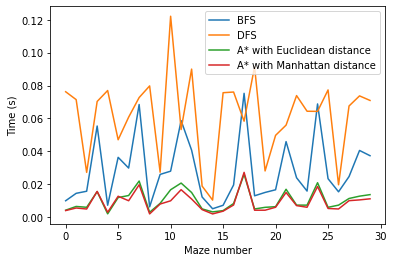

In [121]:
bfs_times = []
dfs_times = []
astar1_times = []
astar2_times = []

# loop through all the mazes
for i in range(30):
    address = "./mazes_input/maze_" + str(i) + ".csv"
    print(address)
    grid = np.genfromtxt(address, delimiter=',', dtype=int)
    grid_dim = grid.shape
    start = (0,0)
    goal = (grid_dim[0]-1, grid_dim[1]-1)
    grid[0, 0] = 2
    grid[-1, -1] = 3
    bfs_times.append(time_bfs(copy.deepcopy(grid), start, goal, grid_dim))
    dfs_times.append(time_dfs(copy.deepcopy(grid), start, goal, grid_dim))
    astar1_times.append(time_astar1(copy.deepcopy(grid), start, goal, grid_dim))
    astar2_times.append(time_astar2(copy.deepcopy(grid), start, goal, grid_dim))

# plot the results
plt.plot(bfs_times, label="BFS")
plt.plot(dfs_times, label="DFS")
plt.plot(astar1_times, label="A* with Euclidean distance")
plt.plot(astar2_times, label="A* with Manhattan distance")
plt.xlabel("Maze number")
plt.ylabel("Time (s)")
plt.legend()
plt.show()

In [122]:
print("Average time for BFS: ", np.mean(bfs_times))
print("Average time for DFS: ", np.mean(dfs_times))
print("Average time for A* with Euclidean distance: ", np.mean(astar1_times))
print("Average time for A* with Manhattan distance: ", np.mean(astar2_times))

Average time for BFS:  0.02857810656229655
Average time for DFS:  0.0617048978805542
Average time for A* with Euclidean distance:  0.010434858004252116
Average time for A* with Manhattan distance:  0.00905303955078125


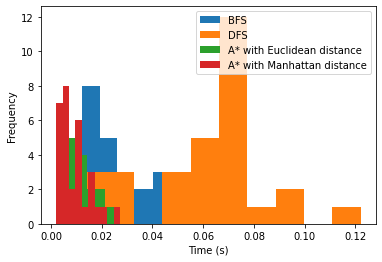

In [123]:
# plot histogram of the results
plt.hist(bfs_times, label="BFS")
plt.hist(dfs_times, label="DFS")
plt.hist(astar1_times, label="A* with Euclidean distance")
plt.hist(astar2_times, label="A* with Manhattan distance")
plt.xlabel("Time (s)")
plt.ylabel("Frequency")
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


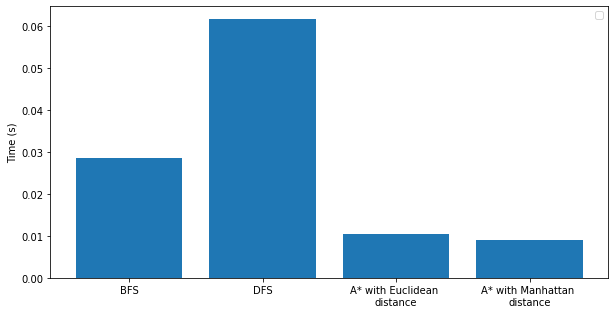

In [124]:
# plot bar chart of the results
plt.figure(figsize=(10, 5))
plt.bar(np.arange(4), [np.mean(bfs_times), np.mean(dfs_times), np.mean(astar1_times), np.mean(astar2_times)])
plt.xticks(np.arange(4), ["BFS", "DFS", "A* with Euclidean \ndistance", "A* with Manhattan \ndistance"])
plt.ylabel("Time (s)")
plt.legend()
plt.show()